#### CLOUD CHARACTERISTATION 

In this part we attempt to learn the mathematical characteristics of latency between the RIPE-ATLAS probes 

In [1]:
# In this notebook we plot the rtt for particular days of the week in a given month for one pair of probes 
import pandas as pd
import numpy  as np
import json
import math 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
hfont = {'fontname':'Monaco'}

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,4]
plt.rcParams['font.size'] =  13 


In [2]:
# read in the experiment data for analysis 
analysis_df = pd.read_pickle('traceroute.pickle')

#drop the rows with null values in avg_rtt
nan_rows = analysis_df[analysis_df['avg_rtt'].isnull()]
analysis_df = analysis_df.dropna(subset=['avg_rtt'])

In [3]:
# Renaming the source probe_id column for easy plotting 
dprb_id = []

for value in analysis_df["dst_id"]:
    if value == '26072':
        dprb_id.append('probe1')
    if value == '30381':
        dprb_id.append('probe2')
    if value == '15632':
        dprb_id.append('probe3')
    if value == '1004200':
        dprb_id.append('probe4')
    if value == '14866':
        dprb_id.append('probe5')
        
        
analysis_df["dst_probe"] = dprb_id

Text(0, 0.5, 'avg_rtt(ms)')

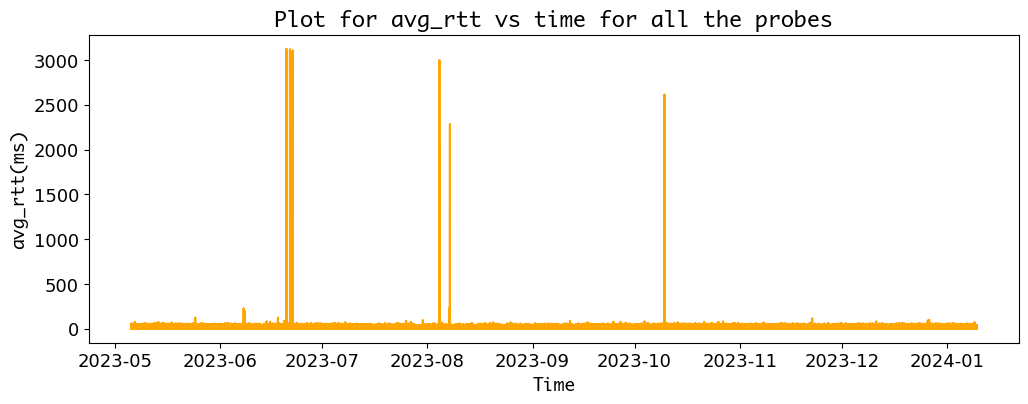

In [4]:
plt.plot(analysis_df['new_time'],analysis_df['avg_rtt'],'-', color='orange')
plt.title('Plot for avg_rtt vs time for all the probes', **hfont )
plt.xlabel('Time', **hfont)
plt.ylabel('avg_rtt(ms)', **hfont)


In [5]:
analysis_df.groupby(['prb_id'])
probe1 = analysis_df[analysis_df['prb_id'] == 33627]
probe2 = analysis_df[analysis_df['prb_id'] == 51265]
probe3 = analysis_df[analysis_df['prb_id'] == 55787]
probe4 = analysis_df[analysis_df['prb_id'] == 61357]
probe5 = analysis_df[analysis_df['prb_id'] == 15118]

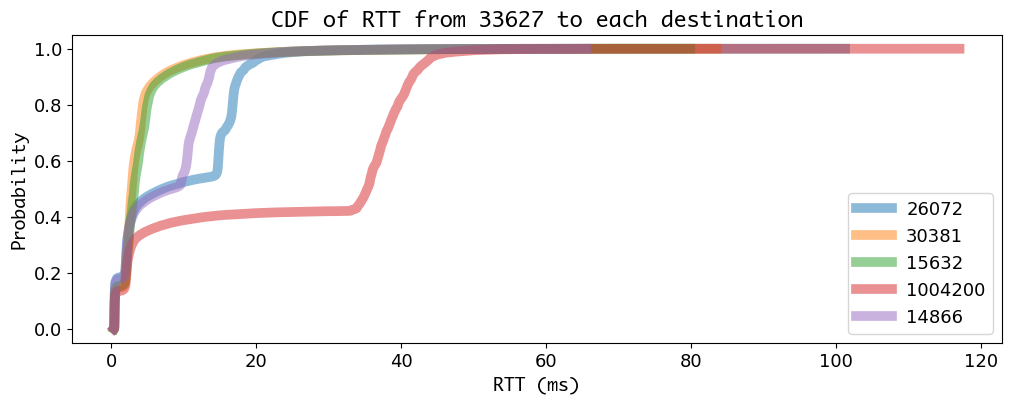

In [6]:
# plotting the cumulative distribution function from one probe to each of the destinations
# https://stackoverflow.com/questions/21321670/how-to-change-fonts-in-matplotlib-python
destination_probes = ['26072','30381','15632','1004200','14866']

for probe in destination_probes:
    df_cdf = probe1[(probe1['dst_id'] == probe)]
    data = df_cdf['avg_rtt'].sort_values()
    cumulative = [i / len(data) for i in range(len(data))]
    plt.plot(data, cumulative, label=probe, alpha=0.5, linewidth=7)

# Add labels and title
plt.xlabel('RTT (ms)',**hfont)
plt.ylabel('Probability', **hfont)
plt.title('CDF of RTT from 33627 to each destination',**hfont)

# Add legend
plt.legend(destination_probes)

Text(0, 0.5, 'Probability')

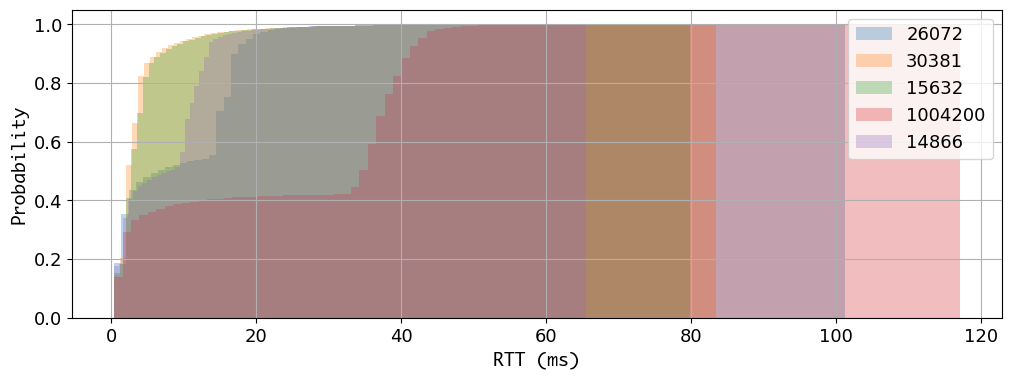

In [7]:
for probe in destination_probes:
    df_cdf = probe1[(probe1['dst_id'] == probe)]
    axx = df_cdf['avg_rtt'].hist(cumulative=True, density=True, bins=100,label= probe,alpha=0.3)
axx.legend(destination_probes)
axx.set_xlabel('RTT (ms)',**hfont)
axx.set_ylabel('Probability', **hfont)


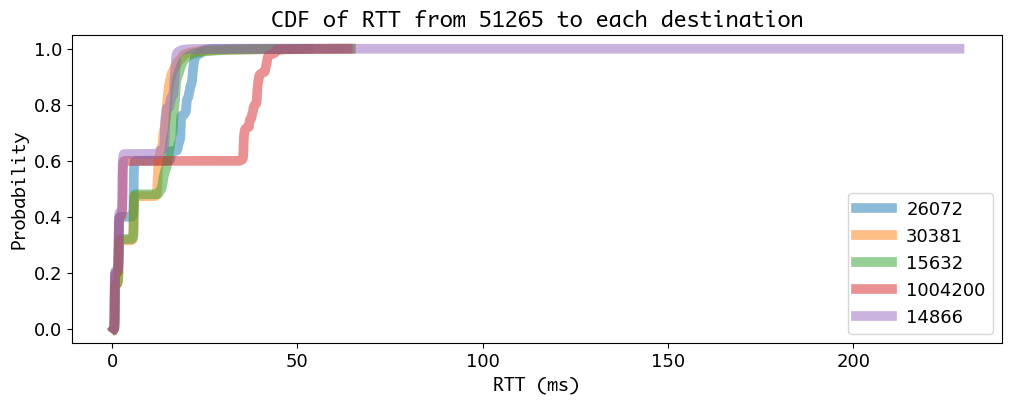

In [8]:

for probe in destination_probes:
    df_cdf = probe2[(probe2['dst_id'] == probe)]
    data = df_cdf['avg_rtt'].sort_values()
    cumulative = [i / len(data) for i in range(len(data))]
    plt.plot(data, cumulative, label=probe, alpha=0.5, linewidth=7)

# Add labels and title


plt.xlabel('RTT (ms)',**hfont)
plt.ylabel('Probability', **hfont)
plt.title('CDF of RTT from 51265 to each destination',**hfont)

# Add legend
plt.legend(destination_probes)


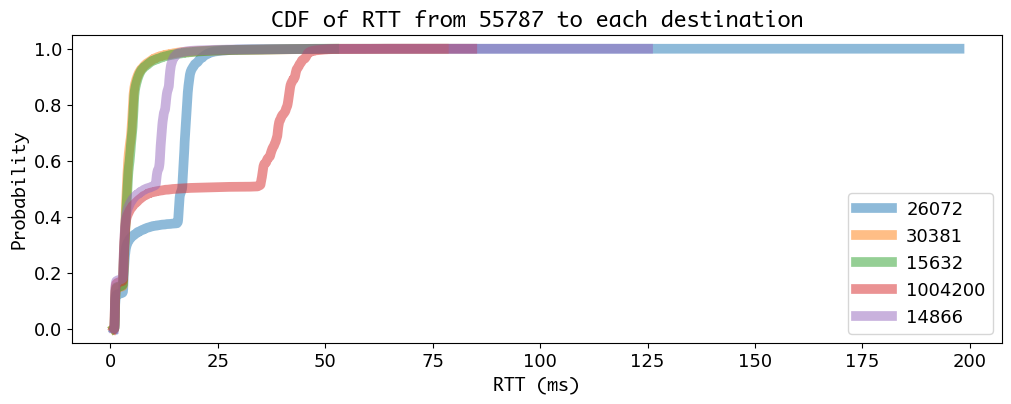

In [9]:
for probe in destination_probes:
    df_cdf = probe3[(probe3['dst_id'] == probe)]
    data = df_cdf['avg_rtt'].sort_values()
    cumulative = [i / len(data) for i in range(len(data))]
    plt.plot(data, cumulative, label=probe, alpha=0.5, linewidth=7)

# Add labels and title
plt.xlabel('RTT (ms)',**hfont)
plt.ylabel('Probability', **hfont)
plt.title('CDF of RTT from 55787 to each destination',**hfont)

# Add legend
plt.legend(destination_probes)

In [10]:
def process_dataframe(df, threshold):
    for index, row in df.iterrows():
        if row['avg_rtt'] > threshold:
            prev_index = index - 1
            next_index = index + 1

            prev_rtt = None
            while prev_index >= 0:
                if df.at[prev_index,'prb_id'] == row['prb_id'] and df.at[prev_index, 'dst_id'] == row['dst_id']:
                    if df.at[prev_index, 'avg_rtt'] <= threshold:
                        prev_rtt = df.at[prev_index, 'avg_rtt']
                        break
                prev_index -= 1

            next_rtt = None
            while next_index < len(df):
                if df.at[next_index, 'prb_id'] == row['prb_id'] and df.at[next_index, 'dst_id'] == row['dst_id']:
                    if df.at[next_index, 'avg_rtt'] <= threshold:
                        next_rtt = df.at[next_index, 'avg_rtt']
                        break
                next_index += 1

            # Calculate the mean of previous and next values if they exist
            if prev_rtt is not None and next_rtt is not None:
                mean_rtt = (prev_rtt + next_rtt) / 2
                if row['avg_rtt'] > threshold:
                    df.at[index, 'avg_rtt'] = mean_rtt
        
    return df

probe4 = analysis_df[analysis_df['prb_id'] == 61357].reset_index(drop=True)
probe4_modified = process_dataframe(probe4,250)

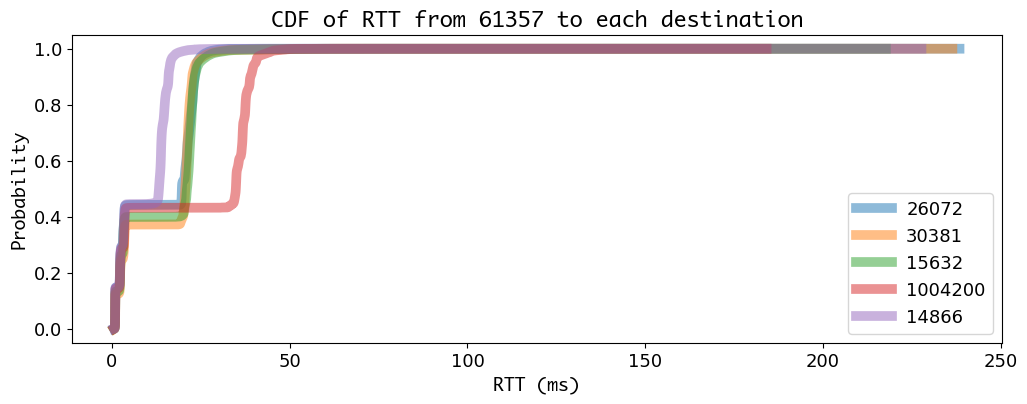

In [11]:
for probe in destination_probes:
    df_cdf = probe4_modified[(probe4_modified['dst_id'] == probe)]
    data = df_cdf['avg_rtt'].sort_values()
    cumulative = [i / len(data) for i in range(len(data))]
    plt.plot(data, cumulative, label=probe, alpha=0.5, linewidth=7)

# Add labels and title
plt.xlabel('RTT (ms)',**hfont)
plt.ylabel('Probability', **hfont)
plt.title('CDF of RTT from 61357 to each destination',**hfont)

# Add legend
plt.legend(destination_probes)

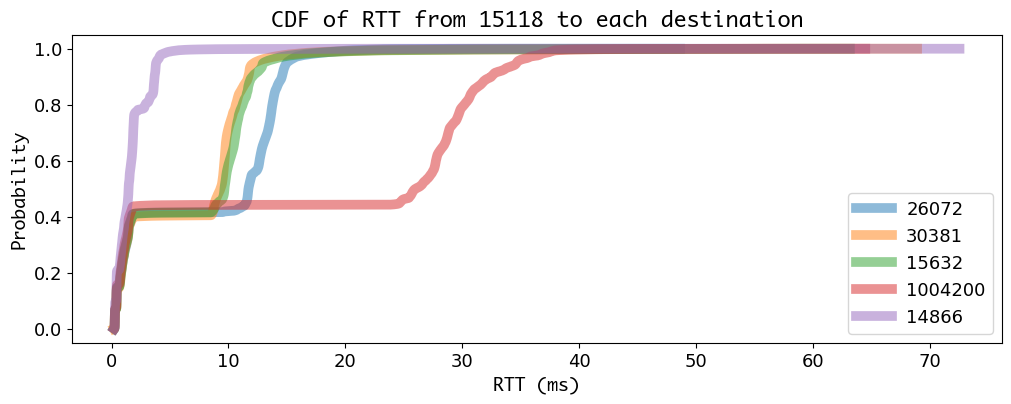

In [12]:
# Create the CDF plot with outlier replacement

probe5 = analysis_df[analysis_df['prb_id'] == 15118].reset_index(drop=True)
probe5_modified = process_dataframe(probe5, 200)

for probe in destination_probes:
    df_cdf = probe5_modified[(probe5_modified['dst_id'] == probe)]
    data = df_cdf['avg_rtt'].sort_values()
    cumulative = [i / len(data) for i in range(len(data))]
    plt.plot(data, cumulative, label=probe, alpha=0.5, linewidth=7)

# Add labels and title
plt.xlabel('RTT (ms)',**hfont)
plt.ylabel('Probability', **hfont)
plt.title('CDF of RTT from 15118 to each destination',**hfont)

# Add legend
plt.legend(destination_probes)


In [13]:
#processing the new_time column further 
analysis_df['year'] = analysis_df['new_time'].dt.year
analysis_df['month'] = analysis_df['new_time'].dt.month
analysis_df['day'] = analysis_df['new_time'].dt.day
analysis_df['minute'] = analysis_df['new_time'].dt.minute

# Days of the week 
#0 - Monday
#1 - Tuesday
#2 - Wednesday
#3 - Thursday
#4 - Friday
#5 - Saturday
#6 - Sunday
analysis_df['day_of_week'] = analysis_df['new_time'].dt.dayofweek

In [14]:
grouped_df = analysis_df.groupby(analysis_df.index).agg({'avg_rtt': 'sum', 'prb_id': 'first', 'dst_id': 'first', 'month': 'first', 'day': 'first', 'Hour': 'first', 'distance': 'first','day_of_week':'first'}).reset_index()
grouped_df.head()

,index,avg_rtt,prb_id,dst_id,month,day,Hour,distance,day_of_week
0,0,8.422667,15118,14866,5,5,19,10.073428,4
1,1,51.423500,33627,14866,5,5,19,500.490567,4
2,2,34.340333,51265,14866,5,5,19,578.872698,4
3,3,34.783333,55787,14866,5,5,19,498.438652,4
4,4,63.070667,61357,14866,5,5,19,351.542413,4


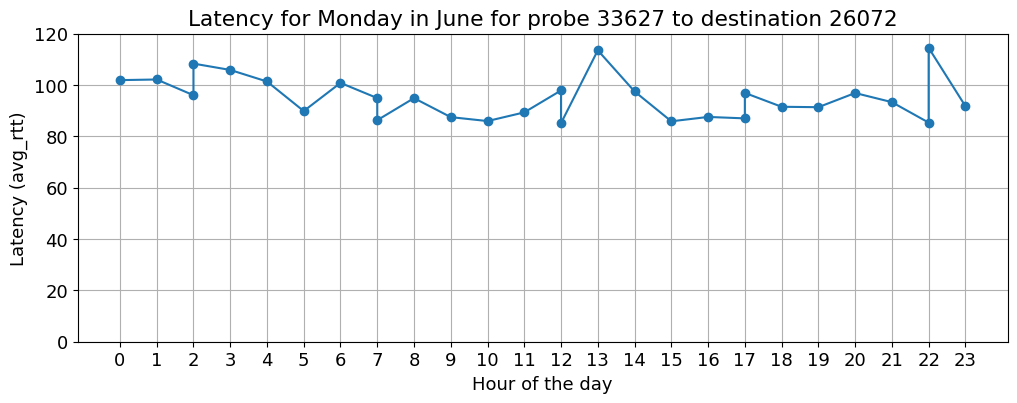

In [15]:
# compare for one day the average rtt for each hour
source = 33627
destination = '26072'
day_of_week  = 0 
day  = 5
month = 6

filtered_df = grouped_df.copy()

one_Day = filtered_df[(filtered_df['day'] == day) & (filtered_df['month'] == month)& (filtered_df['prb_id'] == source) & (filtered_df['dst_id'] == destination)]
plt.plot(one_Day['Hour'], one_Day['avg_rtt'], marker='o')
min_y = 0  # Set to the minimum y-value across all plots
max_y = 120  # Set to the maximum y-value across all plots
# Set the y-axis limits to be the same for all plots
plt.ylim(min_y, max_y)

plt.title('Latency for Monday in June for probe 33627 to destination 26072')
plt.xlabel('Hour of the day')
plt.ylabel('Latency (avg_rtt)')
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.grid(True)
plt.show()


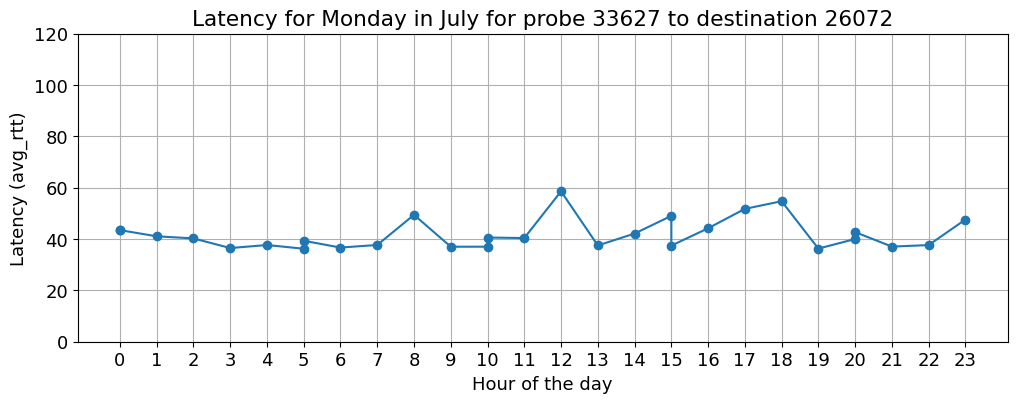

In [16]:
source = 33627
destination = '26072'
day_of_week  = 0 
day  = 3
month = 7

one_Day = filtered_df[ (filtered_df['day'] == day) & (filtered_df['month'] == month)& (filtered_df['prb_id'] == source) & (filtered_df['dst_id'] == destination)]
plt.plot(one_Day['Hour'], one_Day['avg_rtt'], marker='o')
plt.title('Latency for Monday in July for probe 33627 to destination 26072')
plt.xlabel('Hour of the day')
plt.ylabel('Latency (avg_rtt)')
min_y = 0  # Set to the minimum y-value across all plots
max_y = 120  # Set to the maximum y-value across all plots
# Set the y-axis limits to be the same for all plots
plt.ylim(min_y, max_y)
plt.xticks(range(24))  # Assuming 24 hours in a day
plt.grid(True)
plt.show()


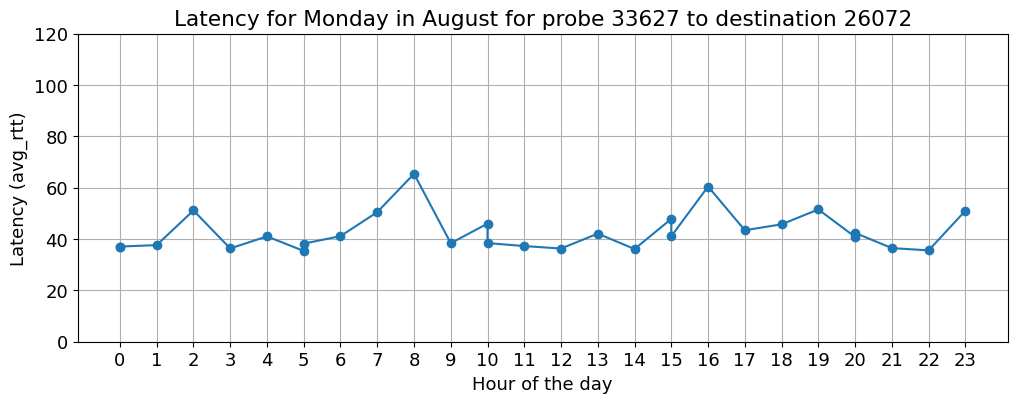

In [17]:
source = 33627
destination = '26072'
day_of_week  = 0 
day  = 7
month = 8

one_Day = filtered_df[(filtered_df['day'] == day) & (filtered_df['month'] == month)& (filtered_df['prb_id'] == source) & (filtered_df['dst_id'] == destination)]
plt.plot(one_Day['Hour'], one_Day['avg_rtt'], marker='o')
plt.title('Latency for Monday in August for probe 33627 to destination 26072')
plt.xlabel('Hour of the day')
plt.ylabel('Latency (avg_rtt)')
plt.xticks(range(24))  # Assuming 24 hours in a day
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.grid(True)
plt.show()


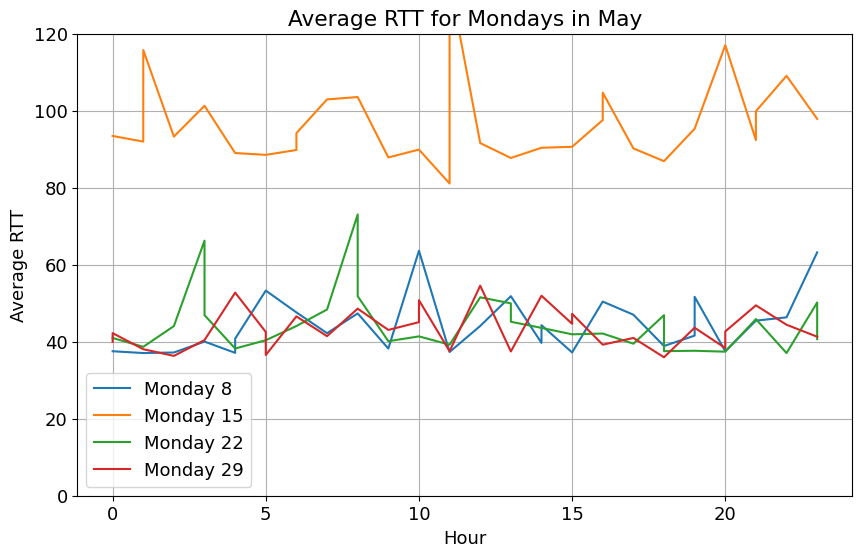

In [18]:
day_of_week  = 0
month = 5
source = 33627
destination = '26072'

filtered_df = grouped_df[(grouped_df['day_of_week'] == day_of_week) & (grouped_df['month'] == month) & (grouped_df['prb_id'] == source) & (grouped_df['dst_id'] == destination)]

# Plot all the data on the same set of axes
plt.figure(figsize=(10, 6))  # Set the figure size to your preference

# Plot the data for each Monday
for day, data in filtered_df.groupby('day'):
    plt.plot(data['Hour'], data['avg_rtt'], label=f"Monday {day}")

plt.xlabel('Hour')
plt.ylabel('Average RTT')
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.legend()
plt.title('Average RTT for Mondays in May')
plt.grid(True)  # Add grid lines if needed

plt.show()

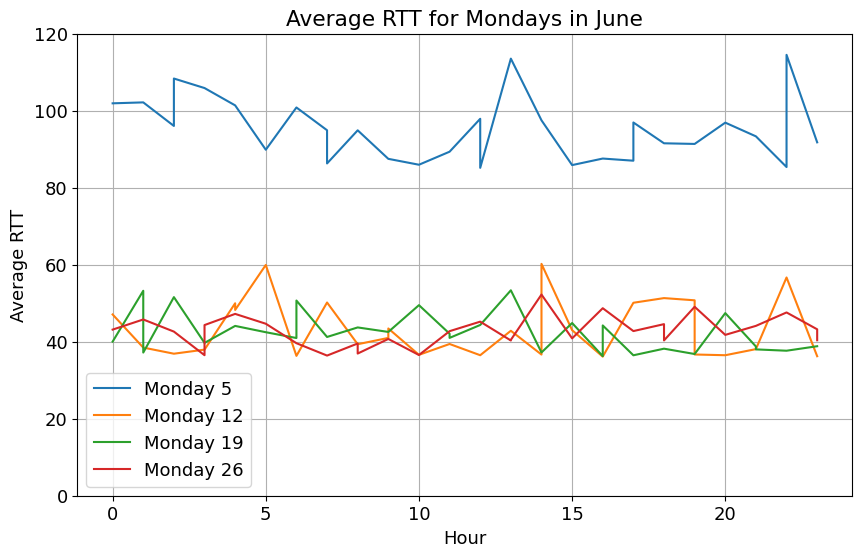

In [19]:
day_of_week  = 0
month = 6
source = 33627
destination = '26072'

filtered_df = grouped_df[(grouped_df['day_of_week'] == day_of_week) & (grouped_df['month'] == month) & (grouped_df['prb_id'] == source) & (grouped_df['dst_id'] == destination)]

# Plot all the data on the same set of axes
plt.figure(figsize=(10, 6))  # Set the figure size to your preference

# Plot the data for each Monday
for day, data in filtered_df.groupby('day'):
    plt.plot(data['Hour'], data['avg_rtt'], label=f"Monday {day}")

plt.xlabel('Hour')
plt.ylabel('Average RTT')
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.legend()
plt.title('Average RTT for Mondays in June')
plt.grid(True)  # Add grid lines if needed

plt.show()

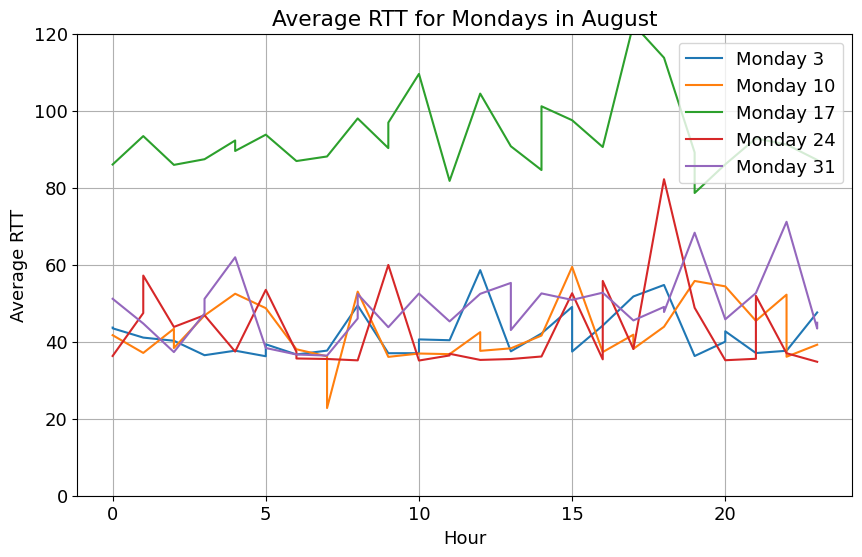

In [20]:
day_of_week  = 0
month = 7
source = 33627
destination = '26072'

filtered_df = grouped_df[(grouped_df['day_of_week'] == day_of_week) & (grouped_df['month'] == month) & (grouped_df['prb_id'] == source) & (grouped_df['dst_id'] == destination)]

# Plot all the data on the same set of axes
plt.figure(figsize=(10, 6))  # Set the figure size to your preference

# Plot the data for each Monday
for day, data in filtered_df.groupby('day'):
    plt.plot(data['Hour'], data['avg_rtt'], label=f"Monday {day}")

plt.xlabel('Hour')
plt.ylabel('Average RTT')
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.legend()
plt.title('Average RTT for Mondays in August')
plt.grid(True)  # Add grid lines if needed

plt.show()

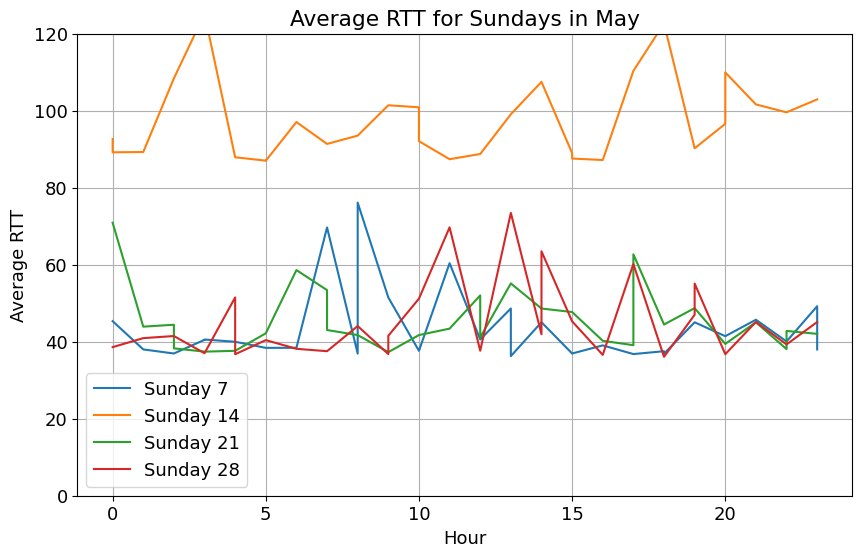

In [21]:
day_of_week  = 6
month = 5
source = 33627
destination = '26072'

filtered_df = grouped_df[(grouped_df['day_of_week'] == day_of_week) & (grouped_df['month'] == month) & (grouped_df['prb_id'] == source) & (grouped_df['dst_id'] == destination)]

# Plot all the data on the same set of axes
plt.figure(figsize=(10, 6))  # Set the figure size to your preference

# Plot the data for each Monday
for day, data in filtered_df.groupby('day'):
    plt.plot(data['Hour'], data['avg_rtt'], label=f"Sunday {day}")

plt.xlabel('Hour')
plt.ylabel('Average RTT')
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.legend()
plt.title('Average RTT for Sundays in May')
plt.grid(True)  # Add grid lines if needed

plt.show()

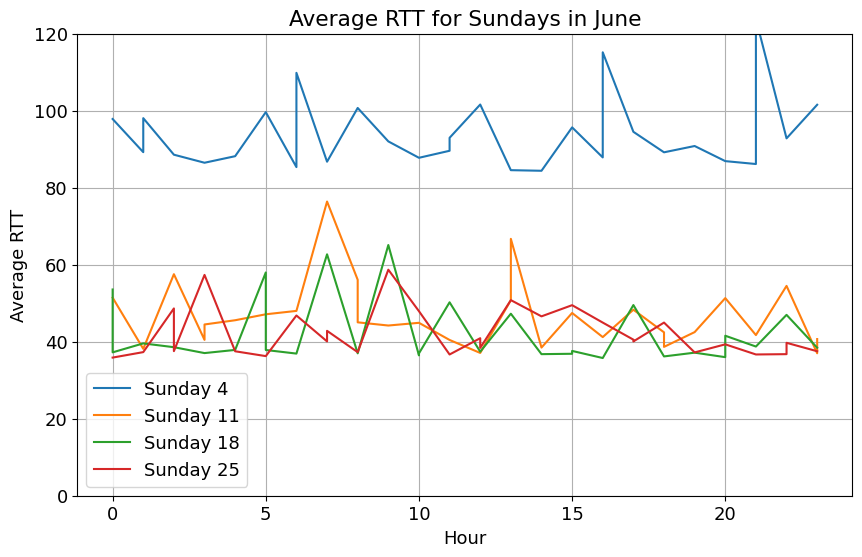

In [22]:
day_of_week  = 6
month = 6
source = 33627
destination = '26072'

filtered_df = grouped_df[(grouped_df['day_of_week'] == day_of_week) & (grouped_df['month'] == month) & (grouped_df['prb_id'] == source) & (grouped_df['dst_id'] == destination)]

# Plot all the data on the same set of axes
plt.figure(figsize=(10, 6))  # Set the figure size to your preference

# Plot the data for each Monday
for day, data in filtered_df.groupby('day'):
    plt.plot(data['Hour'], data['avg_rtt'], label=f"Sunday {day}")

plt.xlabel('Hour')
plt.ylabel('Average RTT')
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.legend()
plt.title('Average RTT for Sundays in June')
plt.grid(True)  # Add grid lines if needed

plt.show()

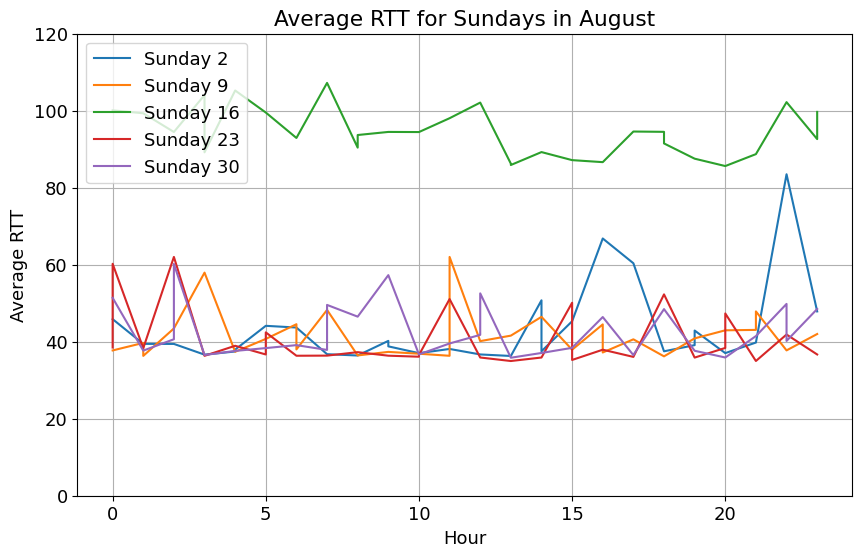

In [23]:
day_of_week  = 6
month = 7
source = 33627
destination = '26072'

filtered_df = grouped_df[(grouped_df['day_of_week'] == day_of_week) & (grouped_df['month'] == month) & (grouped_df['prb_id'] == source) & (grouped_df['dst_id'] == destination)]

# Plot all the data on the same set of axes
plt.figure(figsize=(10, 6))  # Set the figure size to your preference

# Plot the data for each Monday
for day, data in filtered_df.groupby('day'):
    plt.plot(data['Hour'], data['avg_rtt'], label=f"Sunday {day}")

plt.xlabel('Hour')
plt.ylabel('Average RTT')
min_y = 0 
max_y = 120 
plt.ylim(min_y, max_y)
plt.legend()
plt.title('Average RTT for Sundays in August')
plt.grid(True)  # Add grid lines if needed

plt.show()